<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.260687,43.534300,86.198841,0.039176,180.033003,179.993492,0.039512
1,0.0,1.0,88.552522,91.323850,57.534487,0.006532,247.417390,247.408032,0.009358
2,0.0,2.0,44.876406,42.842625,90.353718,-0.029975,188.042775,188.071071,-0.028296
3,0.0,3.0,89.230526,68.793667,74.504795,-0.024422,242.504565,242.523948,-0.019383
4,0.0,4.0,64.988512,64.278988,66.324720,-0.002058,205.590162,205.591910,-0.001748
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.989081,48.525896,86.998446,0.002229,205.515652,205.521785,-0.006133
59996,999.0,56.0,70.698031,42.051896,86.511191,-0.040327,209.220790,209.272401,-0.051611
59997,999.0,57.0,40.500473,69.673048,41.495914,0.011698,161.681133,161.668770,0.012363
59998,999.0,58.0,91.338599,53.635440,33.198602,0.010151,188.182791,188.183076,-0.000285


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.260687  43.534300  86.198841  ...  180.033003  179.993492  0.039512
      1.0    88.552522  91.323850  57.534487  ...  247.417390  247.408032  0.009358
      2.0    44.876406  42.842625  90.353718  ...  188.042775  188.071071 -0.028296
      3.0    89.230526  68.793667  74.504795  ...  242.504565  242.523948 -0.019383
      4.0    64.988512  64.278988  66.324720  ...  205.590162  205.591910 -0.001748
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.989081  48.525896  86.998446  ...  205.515652  205.521785 -0.006133
      56.0   70.698031  42.051896  86.511191  ...  209.220790  209.272401 -0.051611
      57.0   40.500473  69.673048  41.495914  ...  161.681133  161.668770  0.012363
      58.0   91.338599  53.635440  33.198602  ...  188.182791  188.183076 -0.000285
      59.0   22.341381  70.114102  21.802405  ...  124.257596  124.253122  0.004474

[60000 rows x 7 columns]

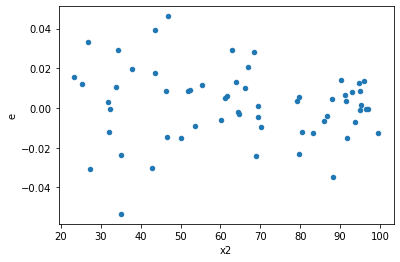

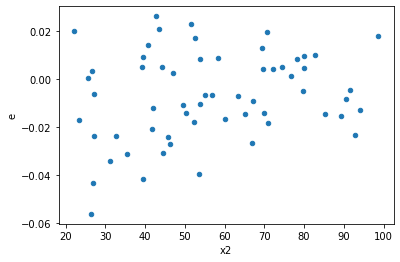

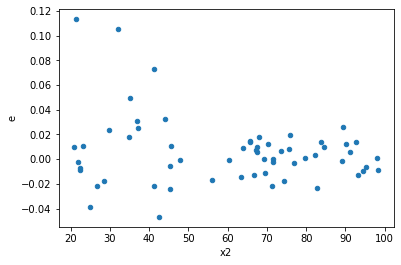

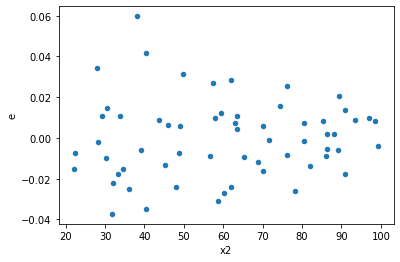

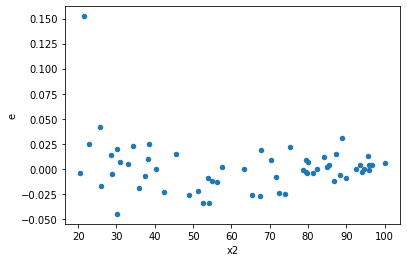

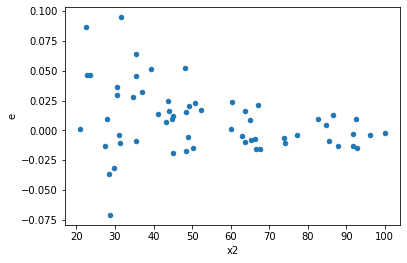

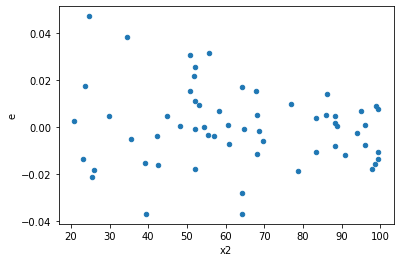

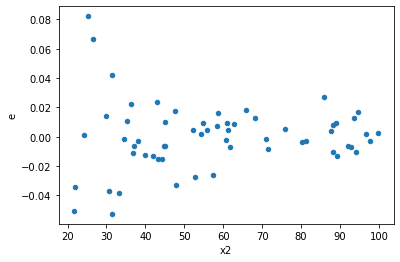

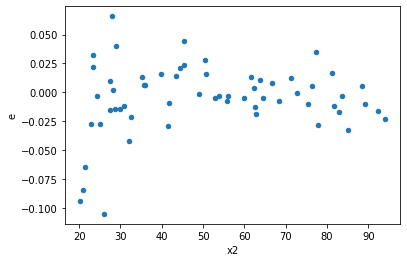

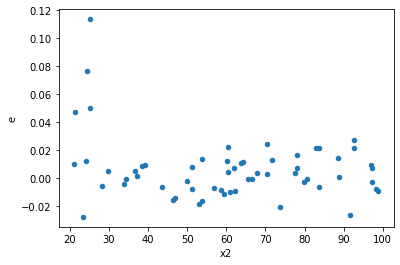

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,26.0,28.0,0.007215587144998585,0.008806474484284474,0.00027752258249994557,0.00031451694586730265,1.1333021732289636,0.7438058973354131,0.6280970513322934,0.37190294866770657,Reject001=1 : Homoscedasticity
2.0,26.0,28.0,0.012744258498788252,0.020059207851687404,0.0004901637884149328,0.0007164002804174072,1.4615528469250385,0.32690284831898664,0.8365485758405067,0.16345142415949332,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,0.009295333188026625,0.011290059238209508,0.00034427159955654167,0.00041815034215590766,1.2145943571718656,0.6170407412951069,0.6914796293524466,0.30852037064755344,Reject001=1 : Homoscedasticity
4.0,30.0,24.0,0.004812548558970931,0.02516574265463922,0.00016041828529903104,0.0010485726106099675,6.536490579333608,1.2450817697073902e-05,0.9999937745911515,6.225408848536951e-06,Reject001=0 : Heteroscedasticity
5.0,27.0,27.0,0.01302160060537896,0.020871164837034457,0.0004822815039029244,0.0007730061050753502,1.6028110114522327,0.22671542221500118,0.8866422888924994,0.11335771110750059,Reject001=1 : Homoscedasticity
6.0,26.0,28.0,0.004723219943389896,0.009738780327587904,0.00018166230551499598,0.0003478135831281394,1.9146161452818722,0.09534323887495111,0.9523283805625244,0.047671619437475554,Reject001=1 : Homoscedasticity
7.0,33.0,21.0,0.007139040376546641,0.019450247491652174,0.00021633455686504972,0.0009262022615072464,4.281342171722545,0.0008957961864450859,0.9995521019067775,0.0004478980932225429,Reject001=0 : Heteroscedasticity
8.0,26.0,28.0,0.02086869612121996,0.028764632473638946,0.00080264215850846,0.0010273083026299623,1.27990822776989,0.5223195802520046,0.7388402098739977,0.2611597901260023,Reject001=1 : Homoscedasticity
9.0,21.0,33.0,0.0050494533181410384,0.01856934511375634,0.00024045015800671613,0.000562707427689586,2.340224819789342,0.027865282503989786,0.9860673587480051,0.013932641251994893,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,0.008505187632042865,0.007966543434302453,0.00031500694933492095,0.00029505716423342416,0.9366687460590407,0.8662689948529099,Reject001=1 : Homoscedasticity
1.0,26.0,28.0,0.007215587144998585,0.008806474484284474,0.00027752258249994557,0.00031451694586730265,1.1333021732289636,0.7438058973354131,Reject001=1 : Homoscedasticity
2.0,26.0,28.0,0.012744258498788252,0.020059207851687404,0.0004901637884149328,0.0007164002804174072,1.4615528469250385,0.32690284831898664,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,0.009295333188026625,0.011290059238209508,0.00034427159955654167,0.00041815034215590766,1.2145943571718656,0.6170407412951069,Reject001=1 : Homoscedasticity
4.0,30.0,24.0,0.004812548558970931,0.02516574265463922,0.00016041828529903104,0.0010485726106099675,6.536490579333608,1.2450817697073902e-05,Reject001=0 : Heteroscedasticity
5.0,27.0,27.0,0.01302160060537896,0.020871164837034457,0.0004822815039029244,0.0007730061050753502,1.6028110114522327,0.22671542221500118,Reject001=1 : Homoscedasticity
6.0,26.0,28.0,0.004723219943389896,0.009738780327587904,0.00018166230551499598,0.0003478135831281394,1.9146161452818722,0.09534323887495111,Reject001=1 : Homoscedasticity
7.0,33.0,21.0,0.007139040376546641,0.019450247491652174,0.00021633455686504972,0.0009262022615072464,4.281342171722545,0.0008957961864450859,Reject001=0 : Heteroscedasticity
8.0,26.0,28.0,0.02086869612121996,0.028764632473638946,0.00080264215850846,0.0010273083026299623,1.27990822776989,0.5223195802520046,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      601
Reject001=0 : Heteroscedasticity    399
Name: Result_test, dtype: int64